# Collect data

In [1]:
import os
import glob
import pandas as pd
os.chdir("/content/drive/MyDrive/Data/Flight Data")

In [2]:
#extension = "csv"
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
# Combine all files in the list
#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
# Export to csv
#combined_csv.to_csv("combined_data.csv", index=False, encoding="utf-8")

In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/Data/Flight Data/combined_data.csv")
len(df)

375783

In [5]:
df.columns

Index(['Time (secs)', 'Date - Month', 'Date - Day', 'UTC - Hour',
       'UTC - Minute', 'UTC - Second', 'Altitude (1013.25mB)',
       'Angle of Attack 1', 'EGT Eng 1', 'EGT Eng 2', 'Computed Airspeed',
       'N1 Actual Eng 1', 'N2 Actual Eng 1', 'N1 Actual Eng 2',
       'N2 Actual Eng 2', 'Oil Low Pressure Eng 1', 'Oil Low Pressure Eng 2',
       'Oil Qty Eng 1', 'Oil Qty Eng 2', 'Roll Angle', 'Roll Angle.1',
       'Total Air Temp', 'Wind Direction True', 'Wind Speed',
       'N1 Vibration Eng 1', 'N1 Vibration Eng 2', 'N2 Vibration Eng 1',
       'N2 Vibration Eng 2', 'Fuel Flow Eng 1', 'Fuel Flow Eng 2'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375783 entries, 0 to 375782
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time (secs)             375783 non-null  float64
 1   Date - Month            93943 non-null   float64
 2   Date - Day              93950 non-null   float64
 3   UTC - Hour              93950 non-null   float64
 4   UTC - Minute            93946 non-null   float64
 5   UTC - Second            93946 non-null   float64
 6   Altitude (1013.25mB)    375783 non-null  object 
 7   Angle of Attack 1       375783 non-null  object 
 8   EGT Eng 1               375783 non-null  int64  
 9   EGT Eng 2               375783 non-null  int64  
 10  Computed Airspeed       375783 non-null  float64
 11  N1 Actual Eng 1         375783 non-null  float64
 12  N2 Actual Eng 1         375783 non-null  float64
 13  N1 Actual Eng 2         375783 non-null  float64
 14  N2 Actual Eng 2     

# Preprocessing Data

## Fillin missing values

In [7]:
# Copy data

df_copy = df.copy()

In [8]:
# Check for columns are numeric

for label, content in df_copy.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

Time (secs)
Date - Month
Date - Day
UTC - Hour
UTC - Minute
UTC - Second
EGT Eng 1
EGT Eng 2
Computed Airspeed
N1 Actual Eng 1
N2 Actual Eng 1
N1 Actual Eng 2
N2 Actual Eng 2
Oil Qty Eng 1
Oil Qty Eng 2
Total Air Temp
Wind Direction True
Wind Speed
N1 Vibration Eng 1
N1 Vibration Eng 2
N2 Vibration Eng 1
N2 Vibration Eng 2
Fuel Flow Eng 1
Fuel Flow Eng 2


In [9]:
# Check for columns which have missing values
for label, content in df_copy.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add binary column whuch tell us if the data was missing or not
      df_copy[label+"is_missing"] = pd.isnull(content)
      # Fill missing numeric values with median
      df_copy[label] = content.fillna(content.median())

In [10]:
# Check null values
for label, content in df_copy.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

No numeric missing values

## Turn Object vars into categorical 

In [11]:
# Find the columns which strings
for label, content in df_copy.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Altitude (1013.25mB)
Angle of Attack 1
Oil Low Pressure Eng 1
Oil Low Pressure Eng 2
Roll Angle
Roll Angle.1


In [12]:
# Turn into category
for label, content in df_copy.items():
  if pd.api.types.is_string_dtype(content):
    df_copy[label] = content.astype("category").cat.as_ordered()

In [13]:
# Check dtypes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375783 entries, 0 to 375782
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   Time (secs)                    375783 non-null  float64 
 1   Date - Month                   375783 non-null  float64 
 2   Date - Day                     375783 non-null  float64 
 3   UTC - Hour                     375783 non-null  float64 
 4   UTC - Minute                   375783 non-null  float64 
 5   UTC - Second                   375783 non-null  float64 
 6   Altitude (1013.25mB)           375783 non-null  category
 7   Angle of Attack 1              375783 non-null  category
 8   EGT Eng 1                      375783 non-null  int64   
 9   EGT Eng 2                      375783 non-null  int64   
 10  Computed Airspeed              375783 non-null  float64 
 11  N1 Actual Eng 1                375783 non-null  float64 
 12  N2 Actual Eng 1 

## Turn categorical vars into nums

In [14]:
for label, content in df_copy.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

Altitude (1013.25mB)
Angle of Attack 1
Oil Low Pressure Eng 1
Oil Low Pressure Eng 2
Roll Angle
Roll Angle.1


In [15]:
for label, content in df_copy.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Turn categorical into numbers and add +1
    df_copy[label] = pd.Categorical(content).codes + 1

In [16]:
# Check
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375783 entries, 0 to 375782
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Time (secs)                    375783 non-null  float64
 1   Date - Month                   375783 non-null  float64
 2   Date - Day                     375783 non-null  float64
 3   UTC - Hour                     375783 non-null  float64
 4   UTC - Minute                   375783 non-null  float64
 5   UTC - Second                   375783 non-null  float64
 6   Altitude (1013.25mB)           375783 non-null  int16  
 7   Angle of Attack 1              375783 non-null  int8   
 8   EGT Eng 1                      375783 non-null  int64  
 9   EGT Eng 2                      375783 non-null  int64  
 10  Computed Airspeed              375783 non-null  float64
 11  N1 Actual Eng 1                375783 non-null  float64
 12  N2 Actual Eng 1               

# Analysis data

## PLot vibration

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

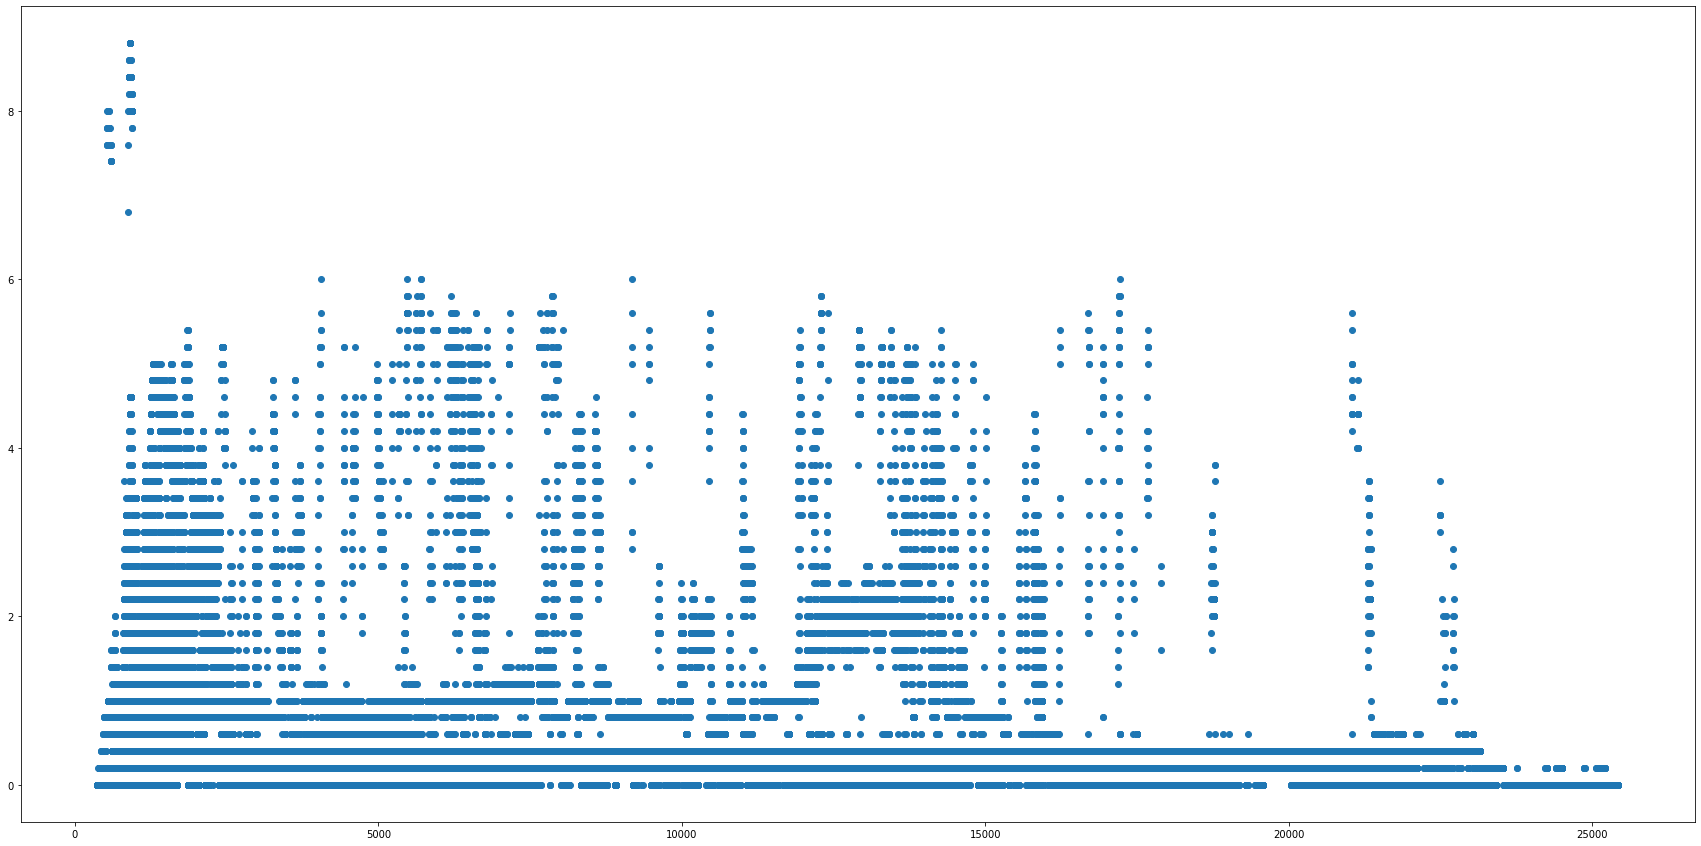

In [18]:
fig, ax = plt.subplots(figsize=(30, 15))
ax = plt.scatter(x = df_copy["Time (secs)"], y = df_copy["N2 Vibration Eng 1"] );


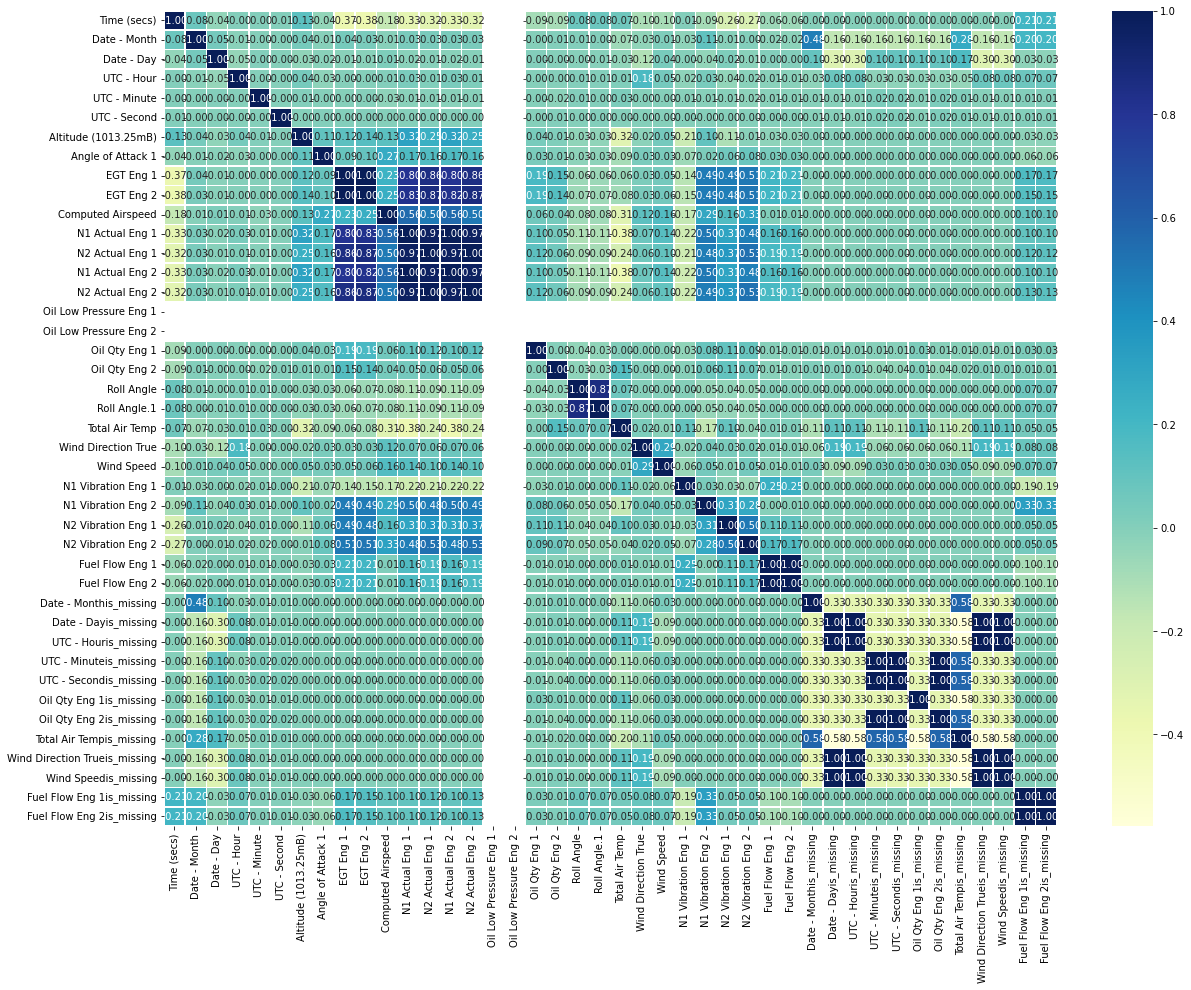

In [19]:
## Make correlation matrix

corr_matrix = df_copy.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=" .2f",
                 cmap="YlGnBu");

In [20]:
len(df_copy)

375783

# Modelling

## Split data into train/validation sets

In [21]:
df_copy.columns

Index(['Time (secs)', 'Date - Month', 'Date - Day', 'UTC - Hour',
       'UTC - Minute', 'UTC - Second', 'Altitude (1013.25mB)',
       'Angle of Attack 1', 'EGT Eng 1', 'EGT Eng 2', 'Computed Airspeed',
       'N1 Actual Eng 1', 'N2 Actual Eng 1', 'N1 Actual Eng 2',
       'N2 Actual Eng 2', 'Oil Low Pressure Eng 1', 'Oil Low Pressure Eng 2',
       'Oil Qty Eng 1', 'Oil Qty Eng 2', 'Roll Angle', 'Roll Angle.1',
       'Total Air Temp', 'Wind Direction True', 'Wind Speed',
       'N1 Vibration Eng 1', 'N1 Vibration Eng 2', 'N2 Vibration Eng 1',
       'N2 Vibration Eng 2', 'Fuel Flow Eng 1', 'Fuel Flow Eng 2',
       'Date - Monthis_missing', 'Date - Dayis_missing',
       'UTC - Houris_missing', 'UTC - Minuteis_missing',
       'UTC - Secondis_missing', 'Oil Qty Eng 1is_missing',
       'Oil Qty Eng 2is_missing', 'Total Air Tempis_missing',
       'Wind Direction Trueis_missing', 'Wind Speedis_missing',
       'Fuel Flow Eng 1is_missing', 'Fuel Flow Eng 2is_missing'],
      dtype='ob

In [22]:
# Split data into X and y
X = df_copy.drop("N2 Actual Eng 1", axis=1)
y = df_copy["N2 Actual Eng 1"]

In [23]:
# Import tool for split data
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
# Split data into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(300626, 75157, 300626, 75157)

##Building an evaluation function

In [26]:
# Create evaluation function

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
  """
  Calculate root mean squared log error between predictions and true labels
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Test RMSLE": rmsle(y_test, test_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Test R^2": r2_score(y_test, test_preds)}
  return scores

## Make baseline model

In [27]:
# Import model

from sklearn.ensemble import RandomForestRegressor

In [28]:
# Make baseline model
%%time
model_1 = RandomForestRegressor(n_jobs=-1,
                                random_state=42,
                                max_samples=10000)
model_1.fit(X_train, y_train)


CPU times: user 29.8 s, sys: 259 ms, total: 30 s
Wall time: 16.1 s


In [29]:
show_scores(model_1)

{'Test MAE': 0.06967402903256073,
 'Test RMSLE': 0.001717844666748406,
 'Test R^2': 0.9993713366425258,
 'Training MAE': 0.06772153772461677,
 'Training RMSLE': 0.0016424659943035044,
 'Training R^2': 0.9994215760537888}

## Hyperparameter tuning with RandomizedSearchCV

## Create Model_2 with RandomizerSearchCV

In [30]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparams
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instiate model

model_2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=100,
                             cv=5,
                             verbose=True)
# Fit model
model_2.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 11min 33s, sys: 46.2 s, total: 12min 19s
Wall time: 28min 56s


In [31]:
model_2_results = show_scores(model_2)
model_2_results

{'Test MAE': 0.0710293443169113,
 'Test RMSLE': 0.001738861094770923,
 'Test R^2': 0.9993549562928337,
 'Training MAE': 0.06961388334091169,
 'Training RMSLE': 0.0016755120358137663,
 'Training R^2': 0.9993964887837677}

In [32]:
# Find the best hyperparams
model_2.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 80}

## Use GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
%%time
np.random.seed(42)

# Setup hyperparams
param_grid = {
    'max_depth': [None, 3],
    'max_features': ["auto", 1],
    'min_samples_leaf': [1, 3, 6],
    'min_samples_split': [10, 12, 14],
    'n_estimators': [10, 20, 30],
    "max_samples": [10000]
}

model_3 = GridSearchCV(RandomForestRegressor(n_jobs=-1,
                                             random_state=42),
                       param_grid=param_grid,
                       cv=5,
                       verbose=True)
#Fit the model
model_3.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 9min 49s, sys: 21.2 s, total: 10min 10s
Wall time: 18min 40s


In [35]:
model_3_results = show_scores(model_3)
model_3_results

{'Test MAE': 0.07207606206262267,
 'Test RMSLE': 0.0017589560057946138,
 'Test R^2': 0.9993384531419229,
 'Training MAE': 0.07070250768568521,
 'Training RMSLE': 0.0017029582790294936,
 'Training R^2': 0.9993757550603897}

In [36]:
model_3.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 30}

# Using best params of GridSearch and make best model

In [37]:
%%time

np.random.seed(42)

model_4 = RandomForestRegressor(n_jobs=-1,
                                random_state=42,
                                max_depth=None,
                                max_features="auto",
                                max_samples=10000,
                                min_samples_leaf=1,
                                min_samples_split=10,
                                n_estimators=30)
model_4.fit(X_train, y_train)


CPU times: user 9.09 s, sys: 59.1 ms, total: 9.15 s
Wall time: 5.25 s


In [38]:
model_4_results = show_scores(model_4)
model_4_results

{'Test MAE': 0.07207606206262264,
 'Test RMSLE': 0.001758956005794613,
 'Test R^2': 0.9993384531419229,
 'Training MAE': 0.07070250768568526,
 'Training RMSLE': 0.0017029582790294936,
 'Training R^2': 0.9993757550603897}

In [39]:
model_2_results

{'Test MAE': 0.0710293443169113,
 'Test RMSLE': 0.001738861094770923,
 'Test R^2': 0.9993549562928337,
 'Training MAE': 0.06961388334091169,
 'Training RMSLE': 0.0016755120358137663,
 'Training R^2': 0.9993964887837677}

In [40]:
model_3_results

{'Test MAE': 0.07207606206262267,
 'Test RMSLE': 0.0017589560057946138,
 'Test R^2': 0.9993384531419229,
 'Training MAE': 0.07070250768568521,
 'Training RMSLE': 0.0017029582790294936,
 'Training R^2': 0.9993757550603897}

## Feature importance

In [48]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

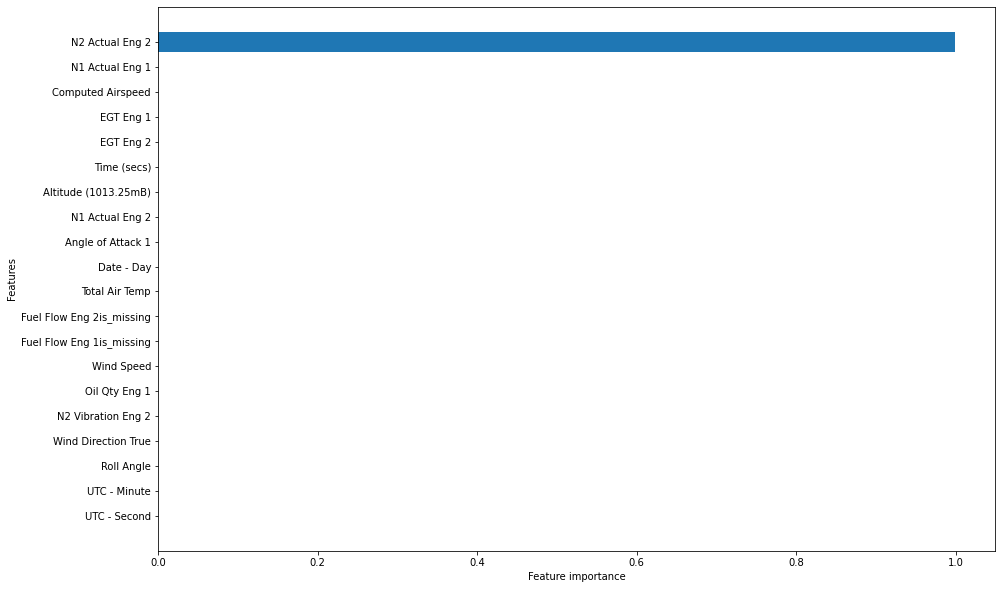

In [49]:
%matplotlib inline
plot_features(X_train.columns, model_4.feature_importances_)

#Testing on unseen data